In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../../src/")


In [4]:
data = pd.read_csv("data/treated_seco.csv")
data

,Unnamed: 0,eventdate,period,subsystem,value,dimension,category,state,planttype,plantname,reservoir,hidrobasin
0,0,2005-01-01 00:00:00,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
1,1,2005-01-08 00:00:00,semana operativa,sudeste/centro-oeste,6.34,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2,2,2005-01-15 00:00:00,semana operativa,sudeste/centro-oeste,0.47,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
3,3,2005-01-22 00:00:00,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
4,4,2005-01-29 00:00:00,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
857,857,2021-04-24 00:00:00,semana operativa,sudeste/centro-oeste,162.29,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
858,858,2021-05-01 00:00:00,semana operativa,sudeste/centro-oeste,173.48,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
859,859,2021-05-08 00:00:00,semana operativa,sudeste/centro-oeste,172.56,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
860,860,2021-05-15 00:00:00,semana operativa,sudeste/centro-oeste,220.13,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN


In [5]:
data["eventdate"] = pd.to_datetime(data["eventdate"])
data.set_index("eventdate", inplace=True, drop=True)
data = data.asfreq("7D")
data.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)
data

,weeks,period,subsystem,value,dimension,category,state,planttype,plantname,reservoir,hidrobasin
eventdate,,,,,,,,,,,
2005-01-01,0,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2005-01-08,1,semana operativa,sudeste/centro-oeste,6.34,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2005-01-15,2,semana operativa,sudeste/centro-oeste,0.47,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2005-01-22,3,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2005-01-29,4,semana operativa,sudeste/centro-oeste,0.00,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-24,857,semana operativa,sudeste/centro-oeste,162.29,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2021-05-01,858,semana operativa,sudeste/centro-oeste,173.48,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN
2021-05-08,859,semana operativa,sudeste/centro-oeste,172.56,r$/mwh,custo marginal de operacao (cmo) - media semanal,NaN,NaN,NaN,NaN,NaN


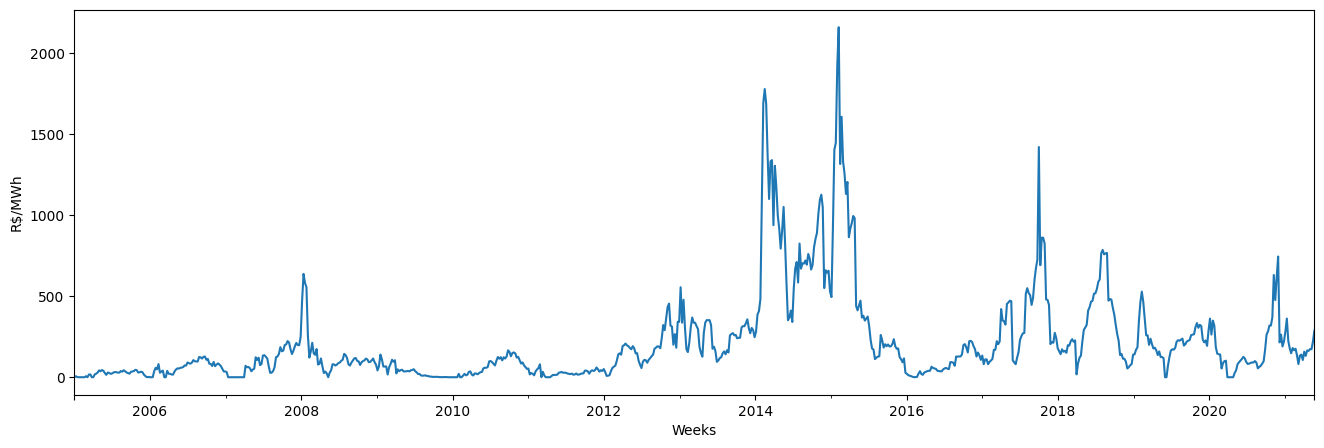

In [6]:
data['value'].plot(figsize=(16, 5))
plt.xlabel('Weeks')
plt.ylabel('R$/MWh')
plt.show()

# Estudo Dados

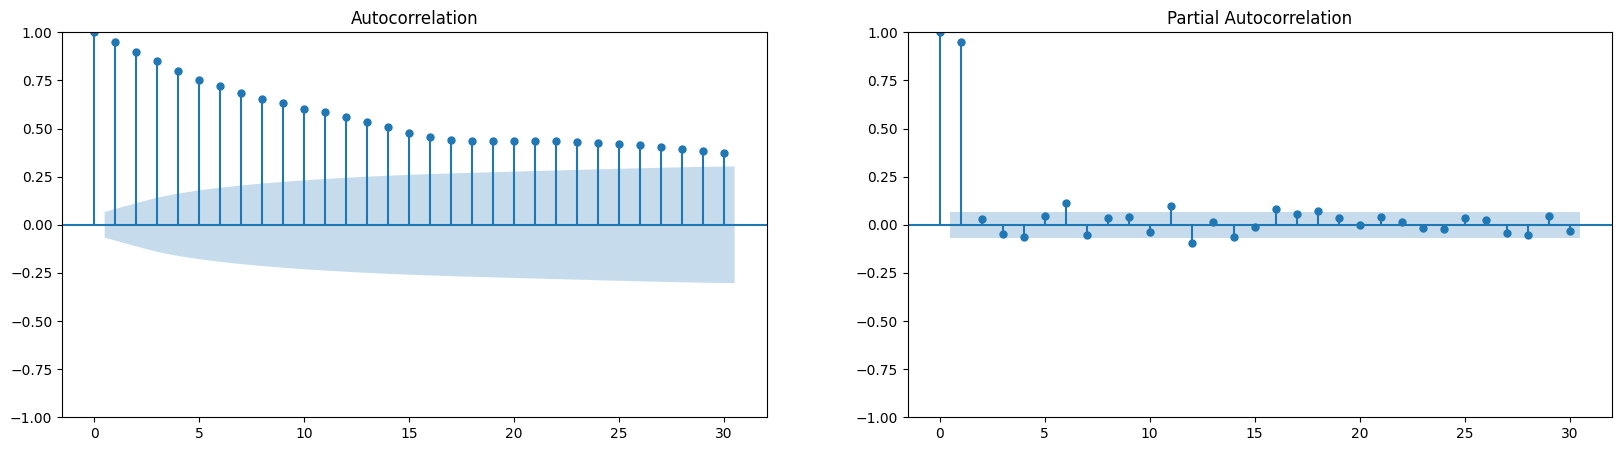

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axs = plt.subplots(1, 2, figsize=(20, 5))

plot_acf(data["value"], lags=30, ax=axs[0])
plot_pacf(data["value"], lags=30, ax=axs[1])
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

adf = adfuller(data["value"])
kp = kpss(data["value"])
if adf[1] > 0.05:
    print(f"ADF: {adf[1]} Não estacionário")
else:
    print(f"ADF: {adf[1]} Estacionário")

if kp[1] < 0.05:
    print(f"kpss: {kp[1]} Não estacionário")
else:
    print(f"kpss: {kp[1]} Estacionário")

ADF: 0.018294456929813824 Estacionário
kpss: 0.01 Não estacionário


C:\Users\lreis\AppData\Local\Temp\ipykernel_16520\4190754958.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kp = kpss(data["value"])


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose



def plot_decomposicao(data, title):
    decomposicao = seasonal_decompose(data["value"])
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(20, 8))
    decomposicao.observed.plot(ax=axs[0], title="Dados Observados")
    decomposicao.trend.plot(ax = axs[1], title="Tendência")
    decomposicao.seasonal.plot(ax = axs[2], title="Sazonalidade")
    decomposicao.resid.plot(ax=axs[3], title="Resíduos")
    plt.suptitle(title)

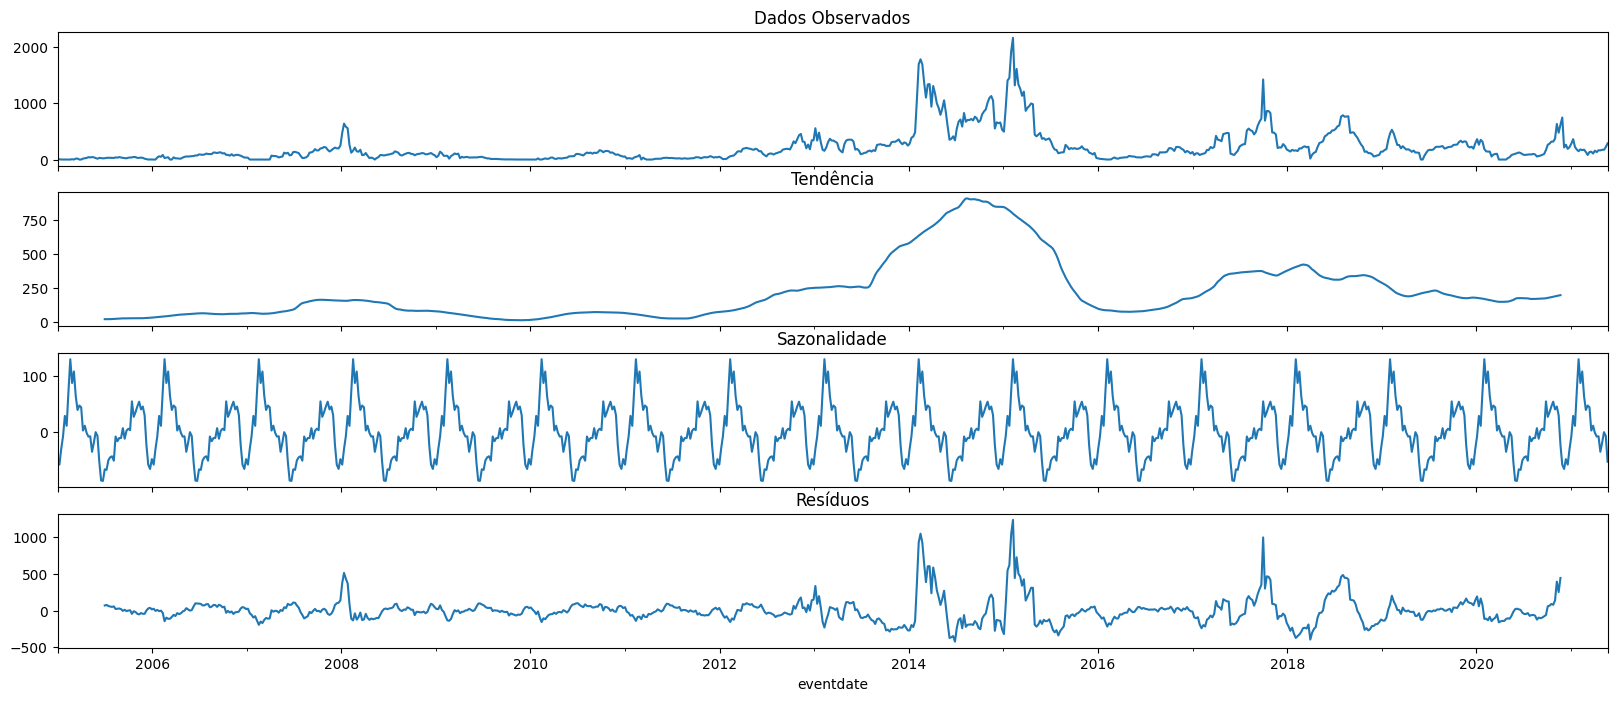

In [10]:
plot_decomposicao(data, "")

# Splitting The Data

In [11]:
data1 = data[data.index < "2012"]
data2 = data[data.index > "2016"]

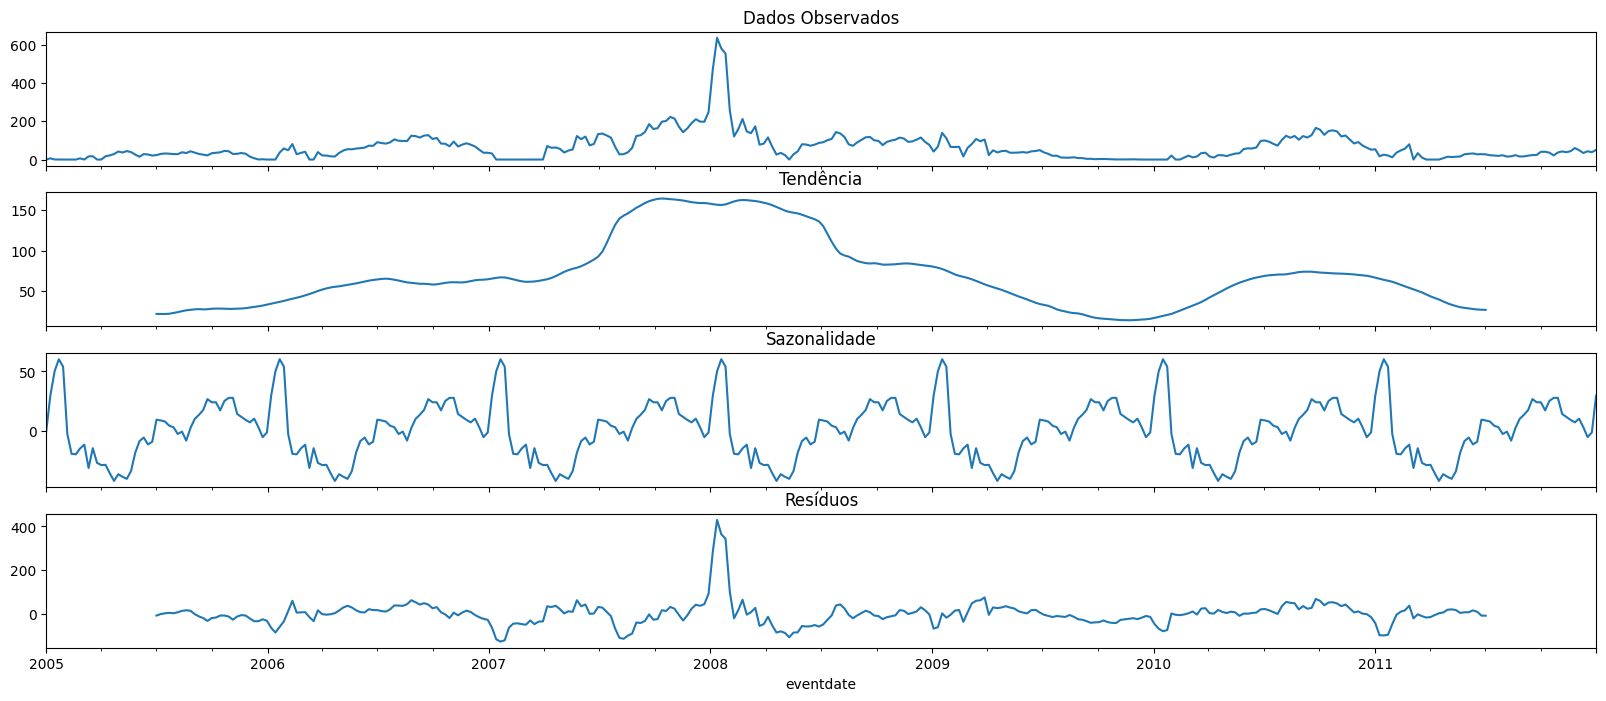

In [12]:
plot_decomposicao(data1, "")

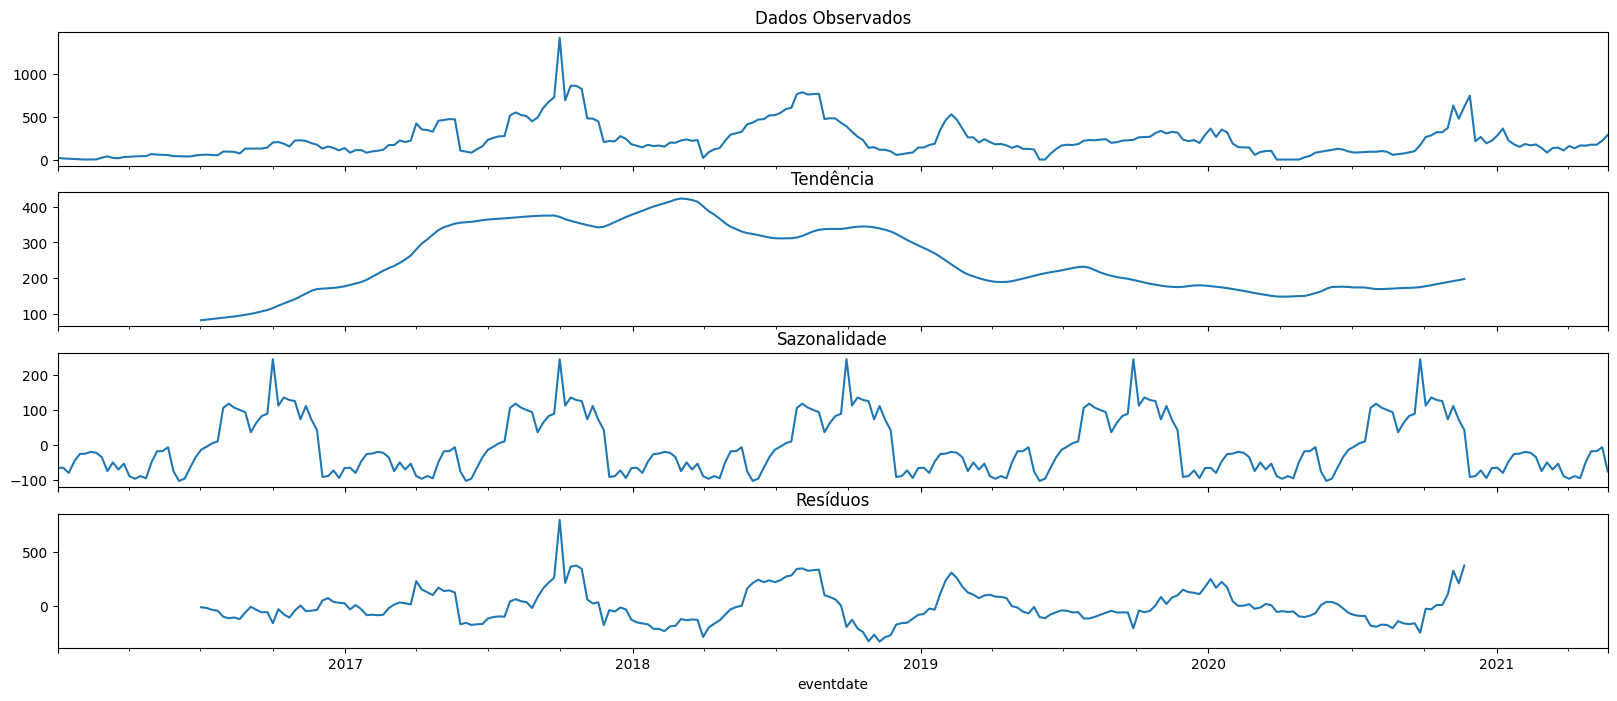

In [13]:
plot_decomposicao(data2, "")

# ARIMA

In [14]:
class a():

    def __init__(self):
        self.c = "a"

    def b():
        pass

A = a()
# hasattr(A, "c")
callable(getattr(A, "c"))

False

In [15]:
divisao = int(len(data)*0.8)

treino = data["value"][:divisao].asfreq("7D")
teste = data["value"][divisao:].asfreq("7D")

In [16]:
def plot_prev(treino, teste, mod, nome_mod=""):
    previsoes = mod.predict(len(treino), len(treino) + len(teste) - 1, dynamic=False)

    plt.figure(figsize=(16, 5))

    plt.plot(teste.index, teste, label="Esperado")
    plt.plot(previsoes.index, previsoes, label="Previsto", color='red')

    plt.title(f"Previsão modelo {nome_mod}")
    plt.ylabel("Temperatura")
    plt.legend()
    plt.show()


    # print("Métricas:")
    # mae = mean_absolute_error(teste, previsoes)
    # print("MAE:", mae)
    # mse = mean_squared_error(teste, previsoes)
    # print("MSE", mse)

d:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


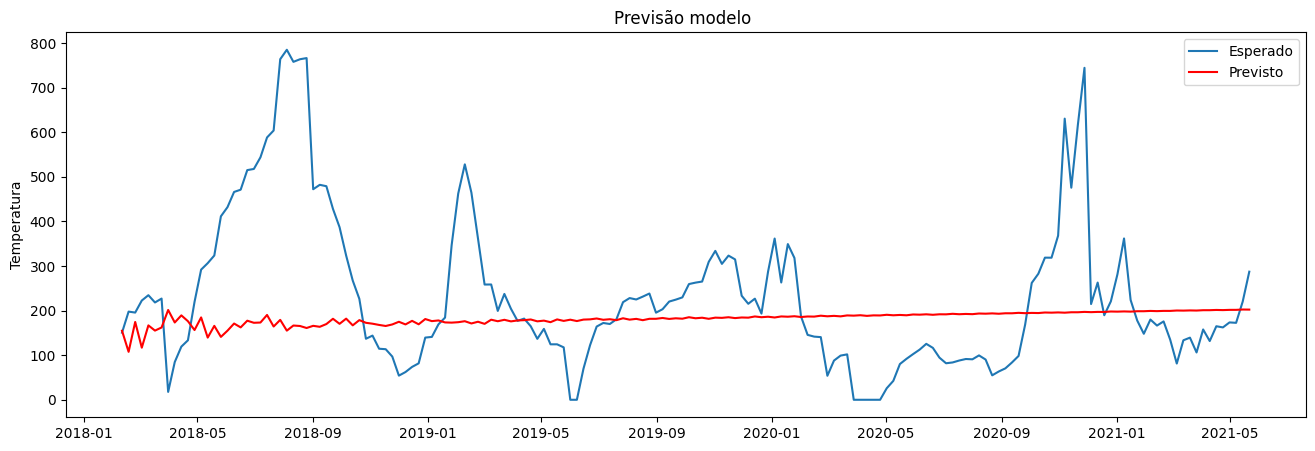

In [17]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(treino, order=(8, 2, 8)).fit()

plot_prev(treino, teste, arima)


# SR Rolling Window

In [31]:
from CSOWP_SR import *
from ExpressionTree import *
import numpy as np

class rollingSR():
    def __init__(self):
        
        # operators = +, -, *, /
        functions = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                     "abs": lambda a: np.abs(a), "exp": lambda a: np.exp(a),
                     "square": lambda a: a**2, "log": lambda a: np.log(a)}

        self.SR = SymbolicRegression(G=2, max_population_size=100, optimization_kind="dual_annealing", functions=functions)

    def fit(self, X, y):
        self.SR.fit(X, y, feature_names=["x"])

    def get_solutions(self):
        return self.SR.predict()

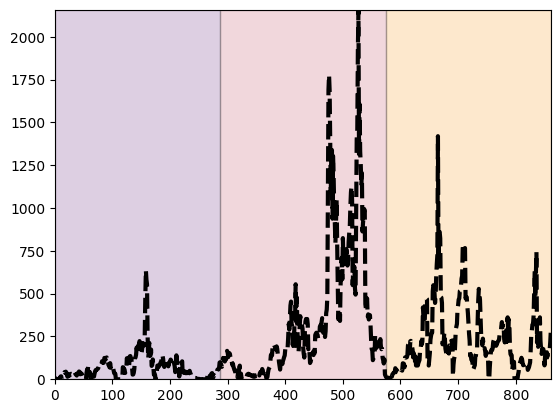

In [32]:
from rollingWindow import rollingWindow

RoWi = rollingWindow(ignore_warnings=True, SEED=42, dir_path="Outputs/CMO/Rolling1")
RoWi.fit(data["weeks"], data["value"], SR_model=rollingSR, nPics=3, visualize=True)
plt.show()

In [33]:
outputs, funcs = RoWi.run(n_processes=6)

In [ ]:
outputs

([<ExpressionTree.ExpressionTree at 0x1e610e06890>, np.float64(0.0)],
  np.float64(312.57517349166915)],
  np.float64(905.5585120042741)],
  np.float64(47205.24525894508)],
  np.float64(0.03615770967765108)],
  np.float64(14557.484359870547)])

In [ ]:
exprs = []

for tree in outputs:
    exprs.append(RoWi.get_expr(tree[0]))

In [ ]:
for expr in exprs:
    display(expr)

0

31.77804221737441*sqrt(tan(0.013221953081795934*x))

sqrt(cos(2.0415453837216245*sqrt(Abs(x))))

sqrt(sin(sqrt(x) + 0.7308571363235914))

sqrt(tan(log(tan(x) + 121.9136791191904)))

sqrt(x*sin(6.6831968877748361*sqrt(x)))

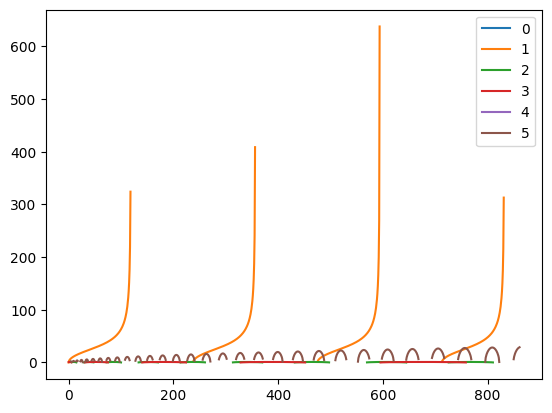

In [ ]:
RoWi.multi_plots([0, data["weeks"].max()])